# Predicting sale price of Ames, IA homes
## Machine learning and regression methods 

The data

## Loading libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Reading in the data

In [27]:
housing = pd.read_csv('AmesHousing.csv')

## Initial Exploration 

The data consists for 2930 records with integer, float, and object data types. It is immediately seen that Alley has numerous null entires.

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   MSSubClass     2930 non-null   int64  
 3   MSZoning       2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

From the first five records, PoolQC, Fence, and MisFeature have many missing values as well.

In [29]:
housing.head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


The average lot area is 10,147 square feet with a median of 9436 square feet. The average selling price is $180,796 with a median of $160,000.

In [30]:
housing.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Missing Values

There are 27 columns that containing missing data. 

In [31]:
housing.isnull().sum(axis=0)

Order              0
PID                0
MSSubClass         0
MSZoning           0
LotFrontage      490
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 82, dtype: int64

In [32]:
nan_cols = [i for i in housing.columns if housing[i].isnull().any()]
print(len(nan_cols))

27


There are four variables where more than 70% of the records are null: Alley, PoolQC, Fence, and MiscFeature. As most of the data is missing, these will not be used in the analysis or model building phase.

In [33]:
nan_cols_remove = [i for i in housing.columns if housing[i].isnull().sum() > 0.70*len(housing)]
print(nan_cols_remove)


['Alley', 'PoolQC', 'Fence', 'MiscFeature']


## Potential Categorical Variables

There are 43 categorical variables in the data set. 

In [34]:
housing_cat_list = list(housing.select_dtypes(include='object'))
len(housing_cat_list)

43

In [35]:
housing_objects = housing.select_dtypes(include='object')
print(housing_objects)

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
1          RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
3          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
2925       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
2926       RL   Pave   NaN      IR1         Low    AllPub    Inside       Mod   
2927       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2928       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Mod   
2929       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition

## Top Factors That Affect Home Value

The top factors that influence the value of a home include location, size, housing market factors, age and condition of the home, renovations, curb appeal, future development, and the economy.

Fields related to these factors include:  

LotArea, Neighborhood, Condition1, OverallCond, YearBuilt, YearRemodAdd, ExterCond, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, TotRmsAbvGrd

## Feature Engineering

### YearBuilt 

As older homes present different advantages and disadvantages than newer homes, the year a house was built will be recoded into groups depending on the age of the house:


1. Historic - 100 years or older
2. Old -  at least 50 but less than 100
3. Moderate - at least 6 but less than 50
4. New - 5 years or less

As De Cock's article was published in 2011, we will use 2011 as the "current" date when calculating house ages. 

In [36]:
housing['age'] = 2011 - housing['YearBuilt']


housing['age_cat'] = pd.cut(housing['age'],
                               bins=[0, 5, 25, 50, 100, np.inf],
                               labels=['0-5','6-25','26-50','51-100','>100'])
housing['age_cat'].value_counts()

51-100    900
6-25      835
26-50     762
0-5       324
>100      109
Name: age_cat, dtype: int64

In [37]:
housing[housing['age']>130][['YearBuilt','age','age_cat']]

,YearBuilt,age,age_cat
215,1875,136,>100
716,1880,131,>100
806,1880,131,>100
1306,1880,131,>100
1318,1872,139,>100
1995,1880,131,>100
1997,1879,132,>100
2647,1880,131,>100


### Remodel

If the house was remodeled, then YearRemodAdd is populated. A new column that takes boolean values will be created to indicate if the house has ever been remodeled. 

In [38]:
housing['Remodel'] = [True if x is not None else False for x in housing['YearRemodAdd']]


### Total Square Footage 

There are various square footage fields in the data and many of these can be consolidated. For instance, GrLivArea (the above (grade) living area square feet) is simply the sum of 1stFlrSF and 2ndFlrSF. 

In [39]:
housing[['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']].head(10)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea
0,1080.0,1656,0,1656
1,882.0,896,0,896
2,1329.0,1329,0,1329
3,2110.0,2110,0,2110
4,928.0,928,701,1629
5,926.0,926,678,1604
6,1338.0,1338,0,1338
7,1280.0,1280,0,1280
8,1595.0,1616,0,1616
9,994.0,1028,776,1804


In [43]:
# find instances of Nulls in the TotalBsmtSF

no_base = housing[housing['TotalBsmtSF'].isna()]
no_base[['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']]

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea
1341,NaN,896,0,896


A new variable is created to be the total living area in a home, or TotalBmstSF + GrLivArea.

In [44]:
housing['TotalSqFt'] = housing['GrLivArea'] + housing['TotalBsmtSF']

### Bathrooms

There are four variables for bathrooms including full and half bath variables for the basement and the rest of the house. These will be consolidated into one variable for total number of bathrooms.

In [52]:
housing['NumBath'] = housing['BsmtFullBath'] + housing['BsmtHalfBath'] + housing['FullBath'] + housing['HalfBath']
housing[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','NumBath']].head()


,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,NumBath
0,1.0,0.0,1,0,2.0
1,0.0,0.0,1,0,1.0
2,0.0,0.0,1,1,2.0
3,1.0,0.0,2,1,4.0
4,0.0,0.0,2,1,3.0


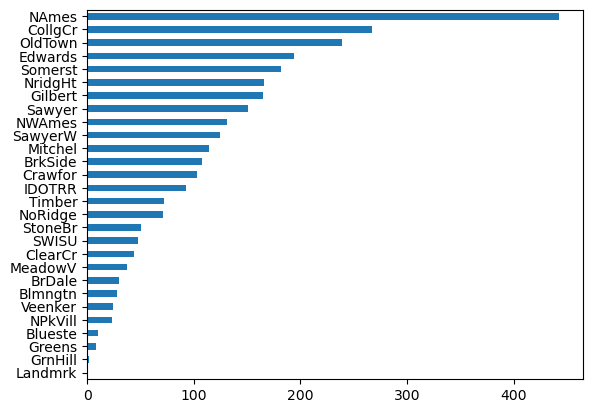

In [53]:
housing_objects['Neighborhood'].value_counts().plot(kind='barh').invert_yaxis()